# Data Storm 2.0 - Team Prophetic

# * Hotel Reservation Cancellation Problem

## Importing needed libraries

In [299]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-storm-20/DataStorm2.0_Q1-v2.pdf
/kaggle/input/data-storm-20/Hotel-A-test.csv
/kaggle/input/data-storm-20/Hotel-A-train.csv
/kaggle/input/data-storm-20/Hotel-A-validation.csv
/kaggle/input/data-storm-20/Hotel-A-data-dictionary.csv


In [300]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None) # To view every column in table

## Importing the Datasets

In [301]:
missing_values = ["n/a", "na", "--", " "]
train = pd.read_csv('/kaggle/input/data-storm-20/Hotel-A-train.csv', na_values = missing_values)
validation = pd.read_csv('/kaggle/input/data-storm-20/Hotel-A-validation.csv', na_values = missing_values)
test = pd.read_csv('/kaggle/input/data-storm-20/Hotel-A-test.csv', na_values = missing_values)

In [302]:
train.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,5/21/2015,2,2,0,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,5/26/2015,3,3,0,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,6/29/2015,3,3,0,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,6/20/2015,4,3,0,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,6/20/2015,1,1,0,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242


In [303]:
validation.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,45716350,M,56,caucasian,Grad,<25K,West,Resort,8/31/2016,9/2/2016,2/18/2016,2,2,0,HB,No,No,No Deposit,Agent,No,No-Show,Yes,15,192
1,88857401,M,60,Latino,College,25K --50K,West,Resort,8/31/2016,9/4/2016,3/9/2016,2,2,0,FB,Yes,No,No Deposit,Online,Yes,Canceled,No,0,187
2,16074440,F,58,Asian American,College,<25K,North,Airport Hotels,9/1/2016,9/2/2016,2/21/2016,3,1,0,FB,No,No,No Deposit,Direct,No,Canceled,Yes,10,227
3,10992124,F,23,Latino,College,25K --50K,East,Airport Hotels,8/31/2016,9/2/2016,5/20/2016,1,2,0,FB,Yes,No,Refundable,Direct,No,Check-In,Yes,25,189
4,15934351,F,47,Asian American,College,25K --50K,South,City Hotel,8/31/2016,9/1/2016,5/31/2016,1,1,0,HB,Yes,No,No Deposit,Online,Yes,Check-In,Yes,10,218


In [304]:
test.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate
0,62931593,F,52,Latino,Grad,25K --50K,South,City Hotel,11/18/2016,11/19/2016,10/28/2016,3,3,0,HB,No,No,No Deposit,Direct,Yes,Yes,10,153
1,70586099,F,47,Latino,Grad,25K --50K,East,Airport Hotels,11/18/2016,11/19/2016,8/6/2016,2,1,0,FB,No,No,No Deposit,Online,No,No,0,210
2,4230648,F,28,Asian American,Grad,<25K,East,City Hotel,4/28/2017,5/1/2017,4/8/2017,2,2,0,BB,No,No,No Deposit,Agent,No,Yes,5,117
3,25192322,F,65,caucasian,High-School,25K --50K,South,Airport Hotels,11/18/2016,11/20/2016,5/20/2016,1,3,2,FB,No,No,No Deposit,Online,Yes,Yes,10,107
4,80931528,M,45,African American,College,25K --50K,South,City Hotel,11/18/2016,11/20/2016,10/31/2016,3,1,0,BB,No,No,Refundable,Agent,No,No,0,119


### Observing the datatype of each column

In [305]:
train.dtypes

Reservation-id             int64
Gender                    object
Age                        int64
Ethnicity                 object
Educational_Level         object
Income                    object
Country_region            object
Hotel_Type                object
Expected_checkin          object
Expected_checkout         object
Booking_date              object
Adults                     int64
Children                   int64
Babies                     int64
Meal_Type                 object
Visted_Previously         object
Previous_Cancellations    object
Deposit_type              object
Booking_channel           object
Required_Car_Parking      object
Reservation_Status        object
Use_Promotion             object
Discount_Rate              int64
Room_Rate                  int64
dtype: object

### Observing the Numerical Behaviour

In [306]:
train.describe()

,Reservation-id,Age,Adults,Children,Babies,Discount_Rate,Room_Rate
count,2.749900e+04,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000
mean,5.016461e+07,43.977454,2.333576,1.743882,0.351540,12.495182,175.136478
std,2.886911e+07,15.303148,1.176526,0.721972,0.573326,11.206036,43.877087
min,3.154000e+03,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000
25%,2.523943e+07,31.000000,2.000000,1.000000,0.000000,5.000000,137.000000
50%,5.014996e+07,44.000000,2.000000,2.000000,0.000000,10.000000,175.000000
75%,7.518288e+07,57.000000,3.000000,2.000000,1.000000,20.000000,214.000000
max,9.999900e+07,70.000000,5.000000,3.000000,2.000000,40.000000,250.000000


## Checking for Null Values

<AxesSubplot:>

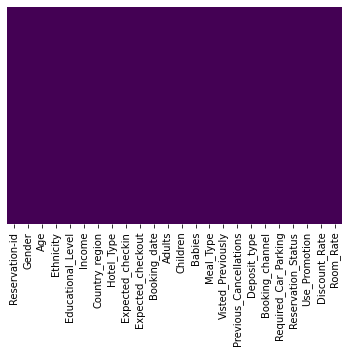

In [307]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

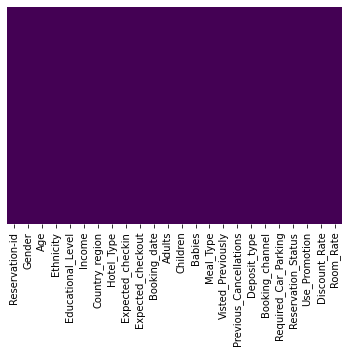

In [308]:
sns.heatmap(validation.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

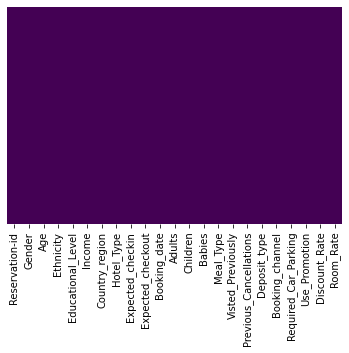

In [309]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [310]:
train.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [311]:
validation.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [312]:
test.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [313]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          27499 non-null  int64 
 1   Gender                  27499 non-null  object
 2   Age                     27499 non-null  int64 
 3   Ethnicity               27499 non-null  object
 4   Educational_Level       27499 non-null  object
 5   Income                  27499 non-null  object
 6   Country_region          27499 non-null  object
 7   Hotel_Type              27499 non-null  object
 8   Expected_checkin        27499 non-null  object
 9   Expected_checkout       27499 non-null  object
 10  Booking_date            27499 non-null  object
 11  Adults                  27499 non-null  int64 
 12  Children                27499 non-null  int64 
 13  Babies                  27499 non-null  int64 
 14  Meal_Type               27499 non-null  object
 15  Vi

## Graphical Representation

### Representation of Target Variable

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

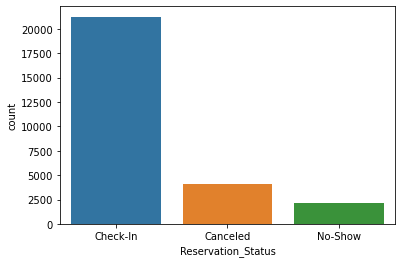

In [314]:
sns.countplot(x = 'Reservation_Status', data=train)

### Observing the Column information

In [315]:
train.nunique()

Reservation-id            27495
Gender                        2
Age                          53
Ethnicity                     4
Educational_Level             4
Income                        4
Country_region                4
Hotel_Type                    3
Expected_checkin            901
Expected_checkout           929
Booking_date               1133
Adults                        5
Children                      3
Babies                        3
Meal_Type                     3
Visted_Previously             2
Previous_Cancellations        2
Deposit_type                  3
Booking_channel               3
Required_Car_Parking          2
Reservation_Status            3
Use_Promotion                 2
Discount_Rate                 8
Room_Rate                   151
dtype: int64

### Representation of other variables with Target Variable

* *ScatterPlots are not used as many features are discrete elements*

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

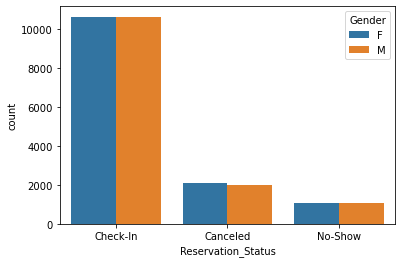

In [316]:
sns.countplot(x = 'Reservation_Status',hue = 'Gender', data=train)

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

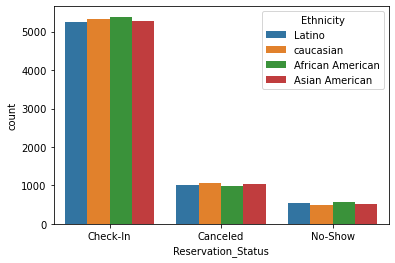

In [317]:
sns.countplot(x = 'Reservation_Status',hue = 'Ethnicity', data=train)

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

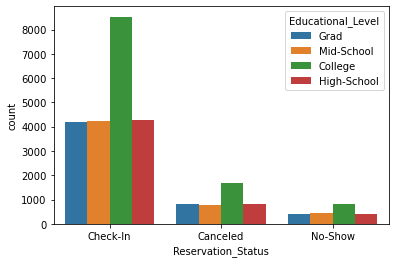

In [318]:
sns.countplot(x = 'Reservation_Status',hue = 'Educational_Level', data=train)

In [319]:
train['Educational_Level'].value_counts()

College        11052
High-School     5522
Mid-School      5481
Grad            5444
Name: Educational_Level, dtype: int64

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

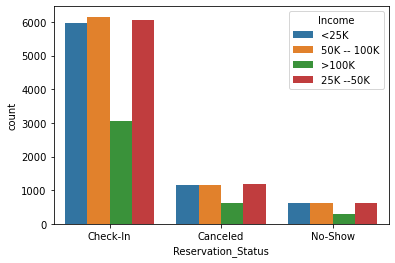

In [320]:
sns.countplot(x = 'Reservation_Status',hue = 'Income', data=train)

In [321]:
train['Income'].value_counts()

50K -- 100K    7936
25K --50K      7870
<25K           7739
>100K          3954
Name: Income, dtype: int64

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

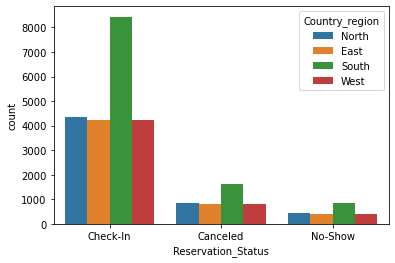

In [322]:
sns.countplot(x = 'Reservation_Status',hue = 'Country_region', data=train)

In [323]:
train['Country_region'].value_counts()

South    10917
North     5670
East      5460
West      5452
Name: Country_region, dtype: int64

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

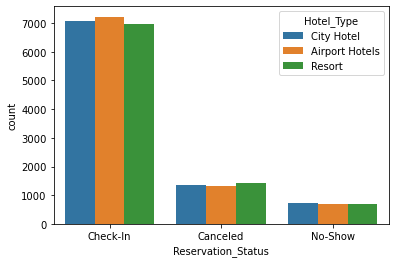

In [324]:
sns.countplot(x = 'Reservation_Status',hue = 'Hotel_Type', data=train)

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

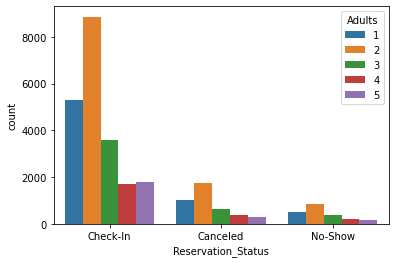

In [325]:
sns.countplot(x = 'Reservation_Status',hue = 'Adults', data=train)

In [326]:
train['Adults'].value_counts()

2    11477
1     6846
3     4619
5     2286
4     2271
Name: Adults, dtype: int64

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

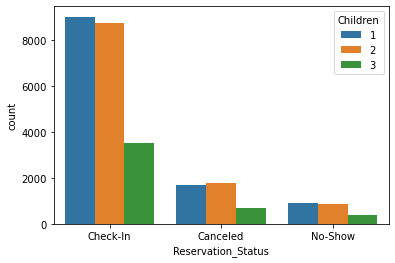

In [327]:
sns.countplot(x = 'Reservation_Status',hue = 'Children', data=train)

In [328]:
train['Children'].value_counts()

1    11590
2    11362
3     4547
Name: Children, dtype: int64

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

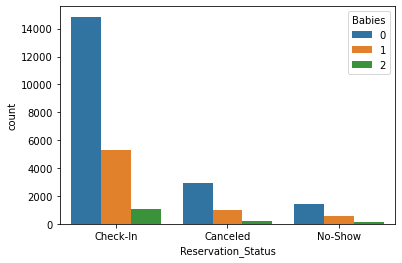

In [329]:
sns.countplot(x = 'Reservation_Status',hue = 'Babies', data=train)

In [330]:
train['Babies'].value_counts()

0    19217
1     6897
2     1385
Name: Babies, dtype: int64

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

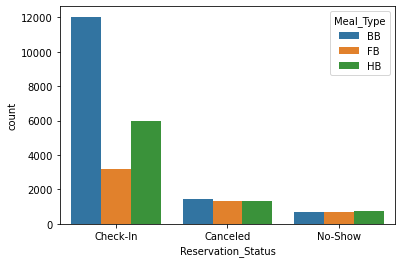

In [331]:
sns.countplot(x = 'Reservation_Status',hue = 'Meal_Type', data=train)

In [332]:
train['Meal_Type'].value_counts()

BB    14224
HB     8081
FB     5194
Name: Meal_Type, dtype: int64

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

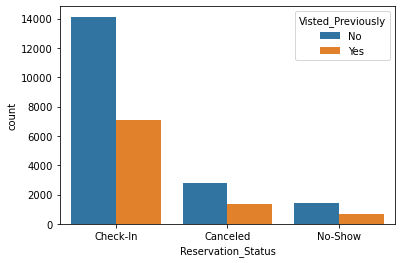

In [333]:
sns.countplot(x = 'Reservation_Status',hue = 'Visted_Previously', data=train)

In [334]:
train['Visted_Previously'].value_counts()

No     18344
Yes     9155
Name: Visted_Previously, dtype: int64

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

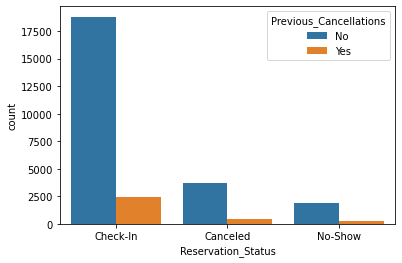

In [335]:
sns.countplot(x = 'Reservation_Status',hue = 'Previous_Cancellations', data=train)

In [336]:
train['Previous_Cancellations'].value_counts()

No     24379
Yes     3120
Name: Previous_Cancellations, dtype: int64

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

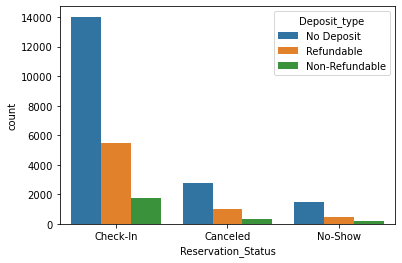

In [337]:
sns.countplot(x = 'Reservation_Status',hue = 'Deposit_type', data=train)

In [338]:
train['Deposit_type'].value_counts()

No Deposit        18244
Refundable         6984
Non-Refundable     2271
Name: Deposit_type, dtype: int64

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

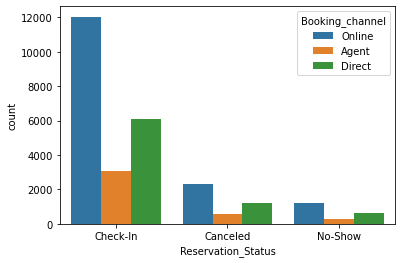

In [339]:
sns.countplot(x = 'Reservation_Status',hue = 'Booking_channel', data=train)

In [340]:
train['Booking_channel'].value_counts()

Online    15574
Direct     7942
Agent      3983
Name: Booking_channel, dtype: int64

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

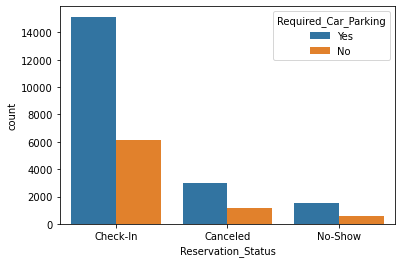

In [341]:
sns.countplot(x = 'Reservation_Status',hue = 'Required_Car_Parking', data=train)

In [342]:
train['Required_Car_Parking'].value_counts()

Yes    19629
No      7870
Name: Required_Car_Parking, dtype: int64

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

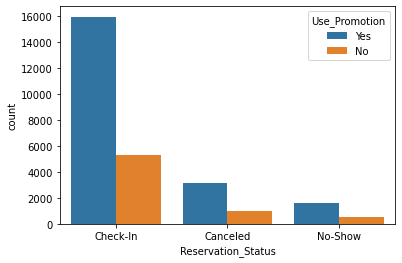

In [343]:
sns.countplot(x = 'Reservation_Status',hue = 'Use_Promotion', data=train)

In [344]:
train['Use_Promotion'].value_counts()

Yes    20670
No      6829
Name: Use_Promotion, dtype: int64

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

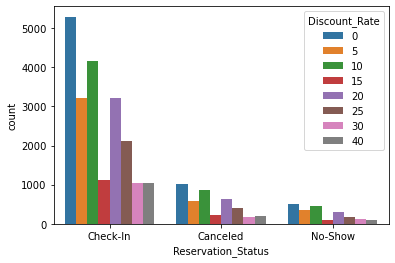

In [345]:
sns.countplot(x = 'Reservation_Status',hue = 'Discount_Rate', data=train)

In [346]:
train['Discount_Rate'].value_counts()

0     6829
10    5469
20    4162
5     4159
25    2721
15    1443
40    1373
30    1343
Name: Discount_Rate, dtype: int64

* *From above graphs show same shape for every Reservation status. But there is a significance value changes in the **Meal type**. Focus on this can make some good move.*

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

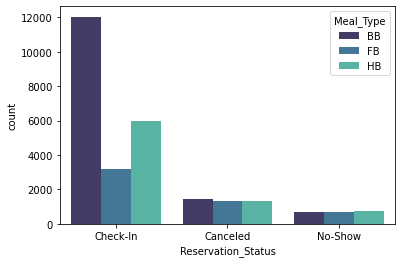

In [347]:
sns.countplot(x = 'Reservation_Status',hue = 'Meal_Type',palette='mako', data=train)

### Have a copy of Datasets

In [348]:
train_copy = train.copy()
validation_copy = validation.copy()
test_copy = test.copy()

### Convert object data to dates


In [349]:
import datetime
train['Expected_checkin'] = pd.to_datetime(train['Expected_checkin'],dayfirst=False, yearfirst=False, format='%m/%d/%Y')
train['Expected_checkout'] = pd.to_datetime(train['Expected_checkout'],dayfirst=True, yearfirst=True, format='%m/%d/%Y')
train['Booking_date'] = pd.to_datetime(train['Booking_date'],dayfirst=True, yearfirst=True, format='%m/%d/%Y')

validation['Expected_checkin'] = pd.to_datetime(validation['Expected_checkin'],dayfirst=False, yearfirst=False, format='%m/%d/%Y')
validation['Expected_checkout'] = pd.to_datetime(validation['Expected_checkout'],dayfirst=True, yearfirst=True, format='%m/%d/%Y')
validation['Booking_date'] = pd.to_datetime(validation['Booking_date'],dayfirst=True, yearfirst=True, format='%m/%d/%Y')

test['Expected_checkin'] = pd.to_datetime(test['Expected_checkin'],dayfirst=False, yearfirst=False, format='%m/%d/%Y')
test['Expected_checkout'] = pd.to_datetime(test['Expected_checkout'],dayfirst=True, yearfirst=True, format='%m/%d/%Y')
test['Booking_date'] = pd.to_datetime(test['Booking_date'],dayfirst=True, yearfirst=True, format='%m/%d/%Y')


## Feature Engineering

In [350]:
#Calculate number of days to stay and add a new column

numOfDays_train = []
numOfDays_valid = []
numOfDays_test = []

daysBeforeStay_train = []
daysBeforeStay_valid = []
daysBeforeStay_test = []

Raws_train=train.shape[0]
Raws_valid=validation.shape[0]
Raws_test=test.shape[0]

for i in range(Raws_train):
    k=str(abs(train.Expected_checkin[i]-train.Expected_checkout[i])) #get the difference and convert to string
    x=str(abs(train.Expected_checkin[i]-train.Booking_date[i])) #days befor stay
    Days=int(k[:1]) #num.ofDays
    daysBeforeStay=int(x[:1]) #num.ofDaysBeforeStay
    numOfDays_train.append(Days)
    daysBeforeStay_train.append(daysBeforeStay)

for i in range(Raws_valid):
    k=str(abs(validation.Expected_checkin[i]-validation.Expected_checkout[i])) #get the difference and convert to string
    x=str(abs(validation.Expected_checkin[i]-validation.Booking_date[i])) #days befor stay
    Days=int(k[:1]) #num.ofDays
    daysBeforeStay=int(x[:1]) #num.ofDaysBeforeStay
    numOfDays_valid.append(Days)
    daysBeforeStay_valid.append(daysBeforeStay)

for i in range(Raws_test):
    k=str(abs(test.Expected_checkin[i]-test.Expected_checkout[i])) #get the difference and convert to string
    x=str(abs(test.Expected_checkin[i]-test.Booking_date[i])) #days befor stay
    Days=int(k[:1]) #num.ofDays
    daysBeforeStay=int(x[:1]) #num.ofDaysBeforeStay
    numOfDays_test.append(Days)
    daysBeforeStay_test.append(daysBeforeStay)
    
train.insert(10, 'days_stay', numOfDays_train, allow_duplicates = False)
validation.insert(10, 'days_stay', numOfDays_valid, allow_duplicates = False)
test.insert(10, 'days_stay', numOfDays_test, allow_duplicates = False)

train.insert(12, 'days_before_stay', daysBeforeStay_train, allow_duplicates = False)
validation.insert(12, 'days_before_stay', daysBeforeStay_valid, allow_duplicates = False)
test.insert(12, 'days_before_stay', daysBeforeStay_test, allow_duplicates = False)

In [351]:
#Total number of people calculation and add a new column

people_train = []
people_valid = []
people_test = []

for row in range(train.shape[0]):
    p=int(train['Adults'][row])+int(train['Children'][row])
    people_train.append(p)
    
for row in range(validation.shape[0]):
    p=int(validation['Adults'][row])+int(validation['Children'][row])
    people_valid.append(p)
    
for row in range(test.shape[0]):
    p=int(test['Adults'][row])+int(test['Children'][row])
    people_test.append(p)
    
train.insert(16, 'Num_of_people', people_train, allow_duplicates = False)
validation.insert(16, 'Num_of_people', people_valid, allow_duplicates = False)
test.insert(16, 'Num_of_people', people_test, allow_duplicates = False)


## Use of Normalization Transform

In [352]:
#min max normalization on 'Age','Room_Rate'

train['Age'] = (train['Age']-train['Age'].min())/(train['Age'].max()-train['Age'].min())
train['Room_Rate'] = (train['Room_Rate']-train['Room_Rate'].min())/(train['Room_Rate'].max()-train['Room_Rate'].min())

validation['Age'] = (validation['Age']-validation['Age'].min())/(validation['Age'].max()-validation['Age'].min())
validation['Room_Rate'] = (validation['Room_Rate']-validation['Room_Rate'].min())/(validation['Room_Rate'].max()-validation['Room_Rate'].min())

test['Age'] = (test['Age']-test['Age'].min())/(test['Age'].max()-test['Age'].min())
test['Room_Rate'] = (test['Room_Rate']-test['Room_Rate'].min())/(test['Room_Rate'].max()-test['Room_Rate'].min())


In [353]:
train.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,days_stay,Booking_date,days_before_stay,Adults,Children,Babies,Num_of_people,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,0.423077,Latino,Grad,<25K,North,City Hotel,2015-07-01,2015-07-02,1,2015-05-21,4,2,2,0,4,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,0.786667
1,77491756,F,0.596154,Latino,Mid-School,50K -- 100K,East,City Hotel,2015-07-01,2015-07-02,1,2015-05-26,3,3,3,0,6,BB,No,No,Refundable,Online,Yes,Check-In,No,0,0.566667
2,73747291,F,0.461538,caucasian,Grad,<25K,East,City Hotel,2015-07-02,2015-07-06,4,2015-06-29,3,3,3,0,6,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,0.126667
3,67301739,M,0.134615,African American,College,>100K,South,Airport Hotels,2015-07-02,2015-07-03,1,2015-06-20,1,4,3,0,7,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,0.293333
4,77222321,F,0.846154,Latino,High-School,25K --50K,East,Resort,2015-07-03,2015-07-04,1,2015-06-20,1,1,1,0,2,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,0.946667


In [354]:
validation.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,days_stay,Booking_date,days_before_stay,Adults,Children,Babies,Num_of_people,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,45716350,M,0.730769,caucasian,Grad,<25K,West,Resort,2016-08-31,2016-09-02,2,2016-02-18,1,2,2,0,4,HB,No,No,No Deposit,Agent,No,No-Show,Yes,15,0.613333
1,88857401,M,0.807692,Latino,College,25K --50K,West,Resort,2016-08-31,2016-09-04,4,2016-03-09,1,2,2,0,4,FB,Yes,No,No Deposit,Online,Yes,Canceled,No,0,0.580000
2,16074440,F,0.769231,Asian American,College,<25K,North,Airport Hotels,2016-09-01,2016-09-02,1,2016-02-21,1,3,1,0,4,FB,No,No,No Deposit,Direct,No,Canceled,Yes,10,0.846667
3,10992124,F,0.096154,Latino,College,25K --50K,East,Airport Hotels,2016-08-31,2016-09-02,2,2016-05-20,1,1,2,0,3,FB,Yes,No,Refundable,Direct,No,Check-In,Yes,25,0.593333
4,15934351,F,0.557692,Asian American,College,25K --50K,South,City Hotel,2016-08-31,2016-09-01,1,2016-05-31,9,1,1,0,2,HB,Yes,No,No Deposit,Online,Yes,Check-In,Yes,10,0.786667


In [355]:
test.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,days_stay,Booking_date,days_before_stay,Adults,Children,Babies,Num_of_people,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate
0,62931593,F,0.653846,Latino,Grad,25K --50K,South,City Hotel,2016-11-18,2016-11-19,1,2016-10-28,2,3,3,0,6,HB,No,No,No Deposit,Direct,Yes,Yes,10,0.353333
1,70586099,F,0.557692,Latino,Grad,25K --50K,East,Airport Hotels,2016-11-18,2016-11-19,1,2016-08-06,1,2,1,0,3,FB,No,No,No Deposit,Online,No,No,0,0.733333
2,4230648,F,0.192308,Asian American,Grad,<25K,East,City Hotel,2017-04-28,2017-05-01,3,2017-04-08,2,2,2,0,4,BB,No,No,No Deposit,Agent,No,Yes,5,0.113333
3,25192322,F,0.903846,caucasian,High-School,25K --50K,South,Airport Hotels,2016-11-18,2016-11-20,2,2016-05-20,1,1,3,2,4,FB,No,No,No Deposit,Online,Yes,Yes,10,0.046667
4,80931528,M,0.519231,African American,College,25K --50K,South,City Hotel,2016-11-18,2016-11-20,2,2016-10-31,1,3,1,0,4,BB,No,No,Refundable,Agent,No,No,0,0.126667


### Dropping of features that were used to discover new Features

In [356]:
TrainSet = train.drop(['Reservation-id','Expected_checkin','Expected_checkout','Booking_date','Adults','Children','Babies'], axis = 1)
ValidationSet = validation.drop(['Reservation-id','Expected_checkin','Expected_checkout','Booking_date','Adults','Children','Babies'], axis = 1)
TestSet = test.drop(['Reservation-id','Expected_checkin','Expected_checkout','Booking_date','Adults','Children','Babies'], axis = 1)

## Ordinal Transformation for Target Variables

In [357]:
TrainSet['Reservation_Status'] = TrainSet['Reservation_Status'].map({'Check-In':1,'Canceled':2,'No-Show':3})
ValidationSet['Reservation_Status'] = ValidationSet['Reservation_Status'].map({'Check-In':1,'Canceled':2,'No-Show':3})

## One Hot Transformation

* *To encode Categorical Variables into Binary Variables*

In [358]:


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer 

columns = ['Gender','Ethnicity','Educational_Level','Income','Country_region','Hotel_Type','Meal_Type','Visted_Previously',
           'Previous_Cancellations','Deposit_type','Booking_channel','Required_Car_Parking','Use_Promotion']

for col in columns:
    one_hot = pd.get_dummies(TrainSet[col], prefix=col)
    TrainSet = TrainSet.join(one_hot)

for col in columns:
    one_hot = pd.get_dummies(ValidationSet[col], prefix=col)
    ValidationSet = ValidationSet.join(one_hot)    

for col in columns:
    one_hot = pd.get_dummies(TestSet[col], prefix=col)
    TestSet = TestSet.join(one_hot) 
    
TrainSet=TrainSet.drop(columns,axis=1)
ValidationSet=ValidationSet.drop(columns,axis=1)
TestSet=TestSet.drop(columns,axis=1)


In [359]:
TrainSet.head()

,Age,days_stay,days_before_stay,Num_of_people,Reservation_Status,Discount_Rate,Room_Rate,Gender_F,Gender_M,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Income_25K --50K,Income_50K -- 100K,Income_<25K,Income_>100K,Country_region_East,Country_region_North,Country_region_South,Country_region_West,Hotel_Type_Airport Hotels,Hotel_Type_City Hotel,Hotel_Type_Resort,Meal_Type_BB,Meal_Type_FB,Meal_Type_HB,Visted_Previously_No,Visted_Previously_Yes,Previous_Cancellations_No,Previous_Cancellations_Yes,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes
0,0.423077,1,4,4,1,10,0.786667,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1
1,0.596154,1,3,6,1,0,0.566667,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0
2,0.461538,4,3,6,1,0,0.126667,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0
3,0.134615,1,1,7,1,5,0.293333,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1
4,0.846154,1,1,2,1,10,0.946667,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1


In [360]:
ValidationSet.head()

,Age,days_stay,days_before_stay,Num_of_people,Reservation_Status,Discount_Rate,Room_Rate,Gender_F,Gender_M,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Income_25K --50K,Income_50K -- 100K,Income_<25K,Income_>100K,Country_region_East,Country_region_North,Country_region_South,Country_region_West,Hotel_Type_Airport Hotels,Hotel_Type_City Hotel,Hotel_Type_Resort,Meal_Type_BB,Meal_Type_FB,Meal_Type_HB,Visted_Previously_No,Visted_Previously_Yes,Previous_Cancellations_No,Previous_Cancellations_Yes,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes
0,0.730769,2,1,4,3,15,0.613333,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1
1,0.807692,4,1,4,2,0,0.580000,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0
2,0.769231,1,1,4,2,10,0.846667,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
3,0.096154,2,1,3,1,25,0.593333,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1
4,0.557692,1,9,2,1,10,0.786667,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1


In [361]:
TestSet.head()

,Age,days_stay,days_before_stay,Num_of_people,Discount_Rate,Room_Rate,Gender_F,Gender_M,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Income_25K --50K,Income_50K -- 100K,Income_<25K,Income_>100K,Country_region_East,Country_region_North,Country_region_South,Country_region_West,Hotel_Type_Airport Hotels,Hotel_Type_City Hotel,Hotel_Type_Resort,Meal_Type_BB,Meal_Type_FB,Meal_Type_HB,Visted_Previously_No,Visted_Previously_Yes,Previous_Cancellations_No,Previous_Cancellations_Yes,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes
0,0.653846,1,2,6,10,0.353333,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1
1,0.557692,1,1,3,0,0.733333,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0
2,0.192308,3,2,4,5,0.113333,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,0.903846,2,1,4,10,0.046667,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1
4,0.519231,2,1,4,0,0.126667,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0


###  Data cleaning by removing Redundant features

In [362]:
TrainSet = TrainSet.drop(['Gender_F','Visted_Previously_No','Previous_Cancellations_No','Required_Car_Parking_No','Use_Promotion_No'], axis = 1)
ValidationSet = ValidationSet.drop(['Gender_F','Visted_Previously_No','Previous_Cancellations_No','Required_Car_Parking_No','Use_Promotion_No'], axis = 1)
TestSet = TestSet.drop(['Gender_F','Visted_Previously_No','Previous_Cancellations_No','Required_Car_Parking_No','Use_Promotion_No'], axis = 1)

## Feature Selection

In [363]:
def correlation(trainSet,threshold):
    col_corr = set()
    corrMatrix = trainSet.corr()
    for i in range (len(corrMatrix.columns)):
        for j in range (i):
            if abs(corrMatrix.iloc[i,j])>threshold:
                colname = corrMatrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(TrainSet,0.7)
list(corr_features)

['Deposit_type_Refundable', 'Booking_channel_Online']

## Finalizing the Datasets used for Modeling

In [364]:
Train_Set = TrainSet.drop(list(corr_features),axis=1)
Validation_Set = ValidationSet.drop(list(corr_features),axis=1)
Test_Set = TestSet.drop(list(corr_features),axis=1)

X_Train = Train_Set.drop(['Reservation_Status'],axis=1)
Y_Train = pd.DataFrame({'Reservation_Status':TrainSet['Reservation_Status'].values.tolist()})

X_Validation = Validation_Set.drop(['Reservation_Status'],axis=1)
Y_Validation = pd.DataFrame({'Reservation_Status':Validation_Set['Reservation_Status'].values.tolist()})

X_Test = Test_Set

In [365]:
Train_Set.head()

,Age,days_stay,days_before_stay,Num_of_people,Reservation_Status,Discount_Rate,Room_Rate,Gender_M,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Income_25K --50K,Income_50K -- 100K,Income_<25K,Income_>100K,Country_region_East,Country_region_North,Country_region_South,Country_region_West,Hotel_Type_Airport Hotels,Hotel_Type_City Hotel,Hotel_Type_Resort,Meal_Type_BB,Meal_Type_FB,Meal_Type_HB,Visted_Previously_Yes,Previous_Cancellations_Yes,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Booking_channel_Agent,Booking_channel_Direct,Required_Car_Parking_Yes,Use_Promotion_Yes
0,0.423077,1,4,4,1,10,0.786667,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1
1,0.596154,1,3,6,1,0,0.566667,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,0.461538,4,3,6,1,0,0.126667,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,0.134615,1,1,7,1,5,0.293333,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1
4,0.846154,1,1,2,1,10,0.946667,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1


In [366]:
Validation_Set.head()

,Age,days_stay,days_before_stay,Num_of_people,Reservation_Status,Discount_Rate,Room_Rate,Gender_M,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Income_25K --50K,Income_50K -- 100K,Income_<25K,Income_>100K,Country_region_East,Country_region_North,Country_region_South,Country_region_West,Hotel_Type_Airport Hotels,Hotel_Type_City Hotel,Hotel_Type_Resort,Meal_Type_BB,Meal_Type_FB,Meal_Type_HB,Visted_Previously_Yes,Previous_Cancellations_Yes,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Booking_channel_Agent,Booking_channel_Direct,Required_Car_Parking_Yes,Use_Promotion_Yes
0,0.730769,2,1,4,3,15,0.613333,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1
1,0.807692,4,1,4,2,0,0.580000,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0
2,0.769231,1,1,4,2,10,0.846667,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1
3,0.096154,2,1,3,1,25,0.593333,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1
4,0.557692,1,9,2,1,10,0.786667,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1


## Modelling Methodology

*In this process, it expects higher* **Macro F1 Score** *as the evaluation matrix. The system has tested for **MLP** MultiLayerPerceptron , **SVM** SupportVectorMachine and **Random Forest** Classifiers. But they give a lower Macro F1 Score for those classifiers.* **KNN** *KNearestNeighbour Classifier shows some better score.*

### kNN classifier

In [367]:
#Number of neighbors = 9

from sklearn.neighbors import KNeighborsClassifier

KNNclassifier9 = KNeighborsClassifier(n_neighbors=9)
KNNclassifier9.fit(X_Train, Y_Train)

Y_pred9 = KNNclassifier9.predict(X_Validation)
Y_pred9

#Confusion matrix and classification report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusionMatrix = confusion_matrix(Y_Validation, Y_pred9)
print('\nConfusion Matrix: \n',confusionMatrix)
print('\nClassification Report: \n',classification_report(Y_Validation, Y_pred9))

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Confusion Matrix: 
 [[1584   23    3]
 [ 725   15    1]
 [ 388   10    0]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.59      0.98      0.74      1610
           2       0.31      0.02      0.04       741
           3       0.00      0.00      0.00       398

    accuracy                           0.58      2749
   macro avg       0.30      0.33      0.26      2749
weighted avg       0.43      0.58      0.44      2749



In [368]:
#Number of neighbors = 7


KNNclassifier7 = KNeighborsClassifier(n_neighbors=7)
KNNclassifier7.fit(X_Train, Y_Train)

Y_pred7 = KNNclassifier7.predict(X_Validation)
Y_pred7

#Confusion matrix and classification report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusionMatrix = confusion_matrix(Y_Validation, Y_pred7)
print('\nConfusion Matrix: \n',confusionMatrix)
print('\nClassification Report: \n',classification_report(Y_Validation, Y_pred7))

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Confusion Matrix: 
 [[1572   34    4]
 [ 714   23    4]
 [ 385   12    1]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.59      0.98      0.73      1610
           2       0.33      0.03      0.06       741
           3       0.11      0.00      0.00       398

    accuracy                           0.58      2749
   macro avg       0.34      0.34      0.27      2749
weighted avg       0.45      0.58      0.45      2749



In [369]:
#Number of neighbors = 5


KNNclassifier5 = KNeighborsClassifier(n_neighbors=5)
KNNclassifier5.fit(X_Train, Y_Train)

Y_pred5 = KNNclassifier5.predict(X_Validation)
Y_pred5

#Confusion matrix and classification report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusionMatrix = confusion_matrix(Y_Validation, Y_pred5)
print('\nConfusion Matrix: \n',confusionMatrix)
print('\nClassification Report: \n',classification_report(Y_Validation, Y_pred5))

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Confusion Matrix: 
 [[1536   64   10]
 [ 703   32    6]
 [ 377   16    5]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.59      0.95      0.73      1610
           2       0.29      0.04      0.08       741
           3       0.24      0.01      0.02       398

    accuracy                           0.57      2749
   macro avg       0.37      0.34      0.28      2749
weighted avg       0.46      0.57      0.45      2749



In [370]:
#Number of neighbors = 3

KNNclassifier = KNeighborsClassifier(n_neighbors=3)
KNNclassifier.fit(X_Train, Y_Train)

Y_pred = KNNclassifier.predict(X_Validation)
Y_pred

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 1, 2, ..., 3, 1, 1])

### Confusion Matrix and Classification Report

In [371]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusionMatrix = confusion_matrix(Y_Validation, Y_pred)
print('\nConfusion Matrix: \n',confusionMatrix)
print('\nClassification Report: \n',classification_report(Y_Validation, Y_pred))


Confusion Matrix: 
 [[1453  118   39]
 [ 666   63   12]
 [ 367   27    4]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.58      0.90      0.71      1610
           2       0.30      0.09      0.13       741
           3       0.07      0.01      0.02       398

    accuracy                           0.55      2749
   macro avg       0.32      0.33      0.29      2749
weighted avg       0.43      0.55      0.45      2749



In [372]:
IDs = test['Reservation-id'].values.tolist()
X_Test_pred = KNNclassifier.predict(X_Test)

data = {'Reservation-id': IDs,'Reservation_Status':X_Test_pred}

DF = pd.DataFrame(data)
DF.to_csv('submission_3.csv', index=False) 
DF

,Reservation-id,Reservation_Status
0,62931593,1
1,70586099,1
2,4230648,1
3,25192322,1
4,80931528,1
...,...,...
4313,39110574,1
4314,5496554,1
4315,59004046,2
4316,65838682,1
